In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import glob
import os


In [3]:
medicine_df=pd.read_excel("/content/Medicine_description.xlsx")
medicine_df.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [4]:
medicine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Drug_Name    22481 non-null  object
 1   Reason       22481 non-null  object
 2   Description  22467 non-null  object
dtypes: object(3)
memory usage: 527.0+ KB


In [5]:
medicine_df.describe()

,Drug_Name,Reason,Description
count,22481,22481,22467
unique,22479,51,300
top,M Cold Plus CZ Tablet 10'S,Supplement,"treat type 2 diabetes mellitus when diet, phys..."
freq,2,3913,671


In [6]:
medicine_df.isnull().sum()

,0
Drug_Name,0
Reason,0
Description,14


In [7]:
medicine_df=medicine_df.dropna()
medicine_df.isnull().sum()

,0
Drug_Name,0
Reason,0
Description,0


Dataset has 51 unique groups of various reasons
********************
And the top 20 Reasons are :
Reason
Supplement       3913
Pain             2852
Infection        2629
Hypertension     2505
Diabetes         2013
Fungal            878
Allergies         851
Depression        628
Anxiety           502
Anaemia           490
Acne              394
Angina            327
Psychosis         301
Constipation      289
Viral             287
Diarrhoea         263
General           243
Malarial          228
Schizophrenia     217
Glaucoma          197
Name: count, dtype: int64
********************


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Supplement'),
  Text(1, 0, 'Pain'),
  Text(2, 0, 'Infection'),
  Text(3, 0, 'Hypertension'),
  Text(4, 0, 'Diabetes'),
  Text(5, 0, 'Fungal'),
  Text(6, 0, 'Allergies'),
  Text(7, 0, 'Depression'),
  Text(8, 0, 'Anxiety'),
  Text(9, 0, 'Anaemia')])

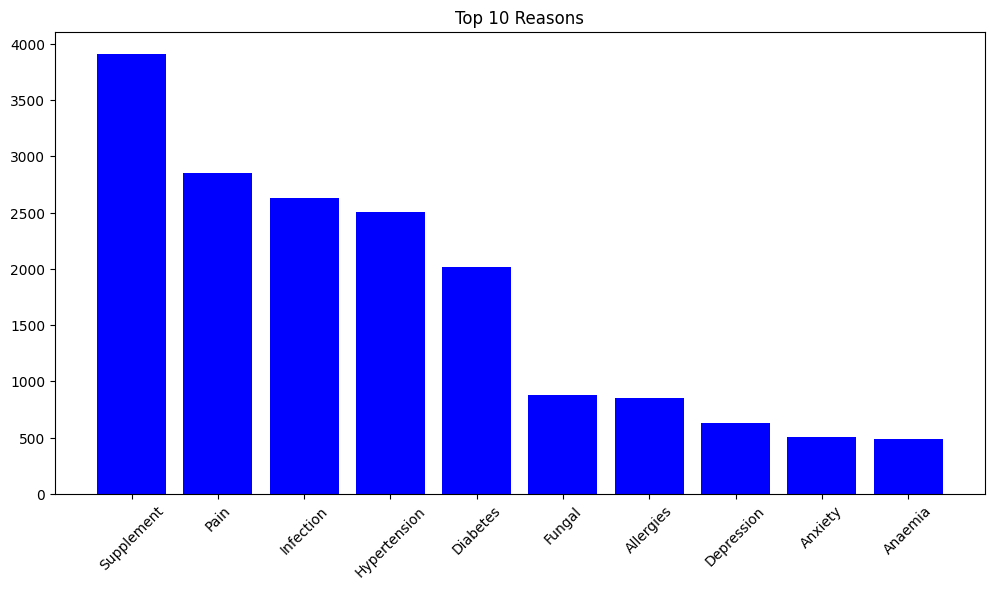

In [8]:
print(f'Dataset has {len(medicine_df.Reason.unique())} unique groups of various reasons')
print('*'*20)
print(f'And the top 20 Reasons are :')
print(medicine_df.Reason.value_counts().head(20))
print('*'*20)

c = medicine_df.Reason.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
plt.title("Top 10 Reasons")
ax.bar(c.index, c.values, width=0.8, color='b')
plt.xticks(rotation=45)

Dataset has 22465 unique groups
********************
And the top 10 Unique Drug Names are :
Drug_Name
Gefer Capsule 10'S                                      2
M Cold Plus CZ Tablet 10'S                              2
Dolodol 50mg Capsule 10'S                               1
Dolocide KP Tablet 10'S                                 1
Dolochek P Tablet 10'S                                  1
Dolochek 200mg Tablet 10'SDolochek 100mg Tablet 10'S    1
Dolocam 20mg Tablet 10'S                                1
Dolobest SR 200mg Tablet 10'S                           1
Dolobest SP Tablet 10'S                                 1
Dolobest P Tablet 10'S                                  1
Name: count, dtype: int64
********************


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, "Gefer Capsule 10'S"),
  Text(1, 0, "M Cold Plus CZ Tablet 10'S"),
  Text(2, 0, "Dolodol 50mg Capsule 10'S"),
  Text(3, 0, "Dolocide KP Tablet 10'S"),
  Text(4, 0, "Dolochek P Tablet 10'S"),
  Text(5, 0, "Dolochek 200mg Tablet 10'SDolochek 100mg Tablet 10'S"),
  Text(6, 0, "Dolocam 20mg Tablet 10'S"),
  Text(7, 0, "Dolobest SR 200mg Tablet 10'S"),
  Text(8, 0, "Dolobest SP Tablet 10'S"),
  Text(9, 0, "Dolobest P Tablet 10'S")])

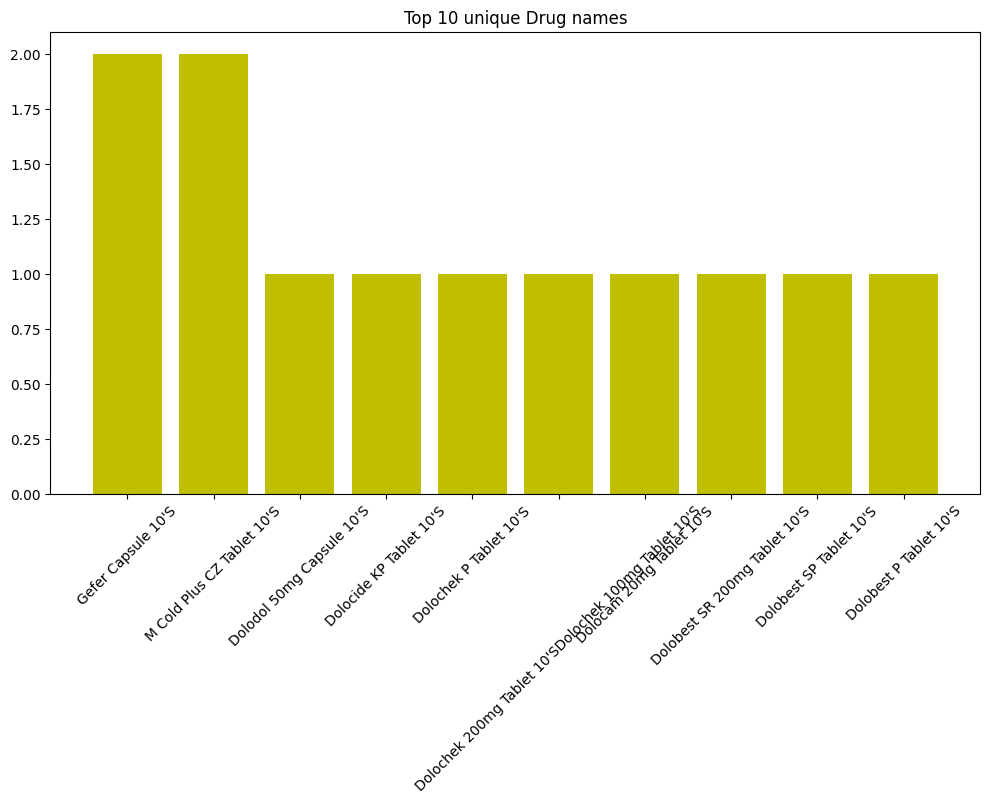

In [9]:
print(f'Dataset has {len(medicine_df.Drug_Name.unique())} unique groups')
print('*'*20)
print(f'And the top 10 Unique Drug Names are :')
print(medicine_df.Drug_Name.value_counts().head(10))
print('*'*20)

c = medicine_df.Drug_Name.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
plt.title("Top 10 unique Drug names")
ax.bar(c.index, c.values, width=0.8, color='y')
plt.xticks(rotation=45)

Dataset has 300 unique names
********************
And the top 10 counts are :
Drug_Name                                                                                                                                          Reason          Description                                                                                                                                                 
Zyven OD 25mg Tablet 10'SZyven OD 50mg Tablet 10'SZyven OD 100mg Tablet 10'S                                                                       Depression      prevents depression and anxiety disorder (chronic feeling of anxiety or nervousness)                                                                            1
1 AL M 10/5mg Tablet 10'S                                                                                                                          Allergies       It is used to treat acne vulgaris in people 12 years of age and older. Acne vulgaris is a condition in which the s

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'treat type 2 diabetes mellitus when diet, physical exercise and weight reduction alone have not been able to control your blood sugar levels'),
  Text(1, 0, 'reduces the diabetes'),
  Text(2, 0, 'reduces sugar level diabetes'),
  Text(3, 0, 'lower\xa0chance of stroke in patients with high blood pressure and a heart problem called left ventricular hypertrophy (LVH)'),
  Text(4, 0, 'lower high blood pressure (hypertension)'),
  Text(5, 0, 'improves immunity'),
  Text(6, 0, 'infection \xa0of the chest in adults with chronic bronchitis'),
  Text(7, 0, 'urinary\xa0tract and kidneys'),
  Text(8, 0, 'infection during surgery'),
  Text(9, 0, 'used for treating high blood pressure (essential hypertension) in adults')])

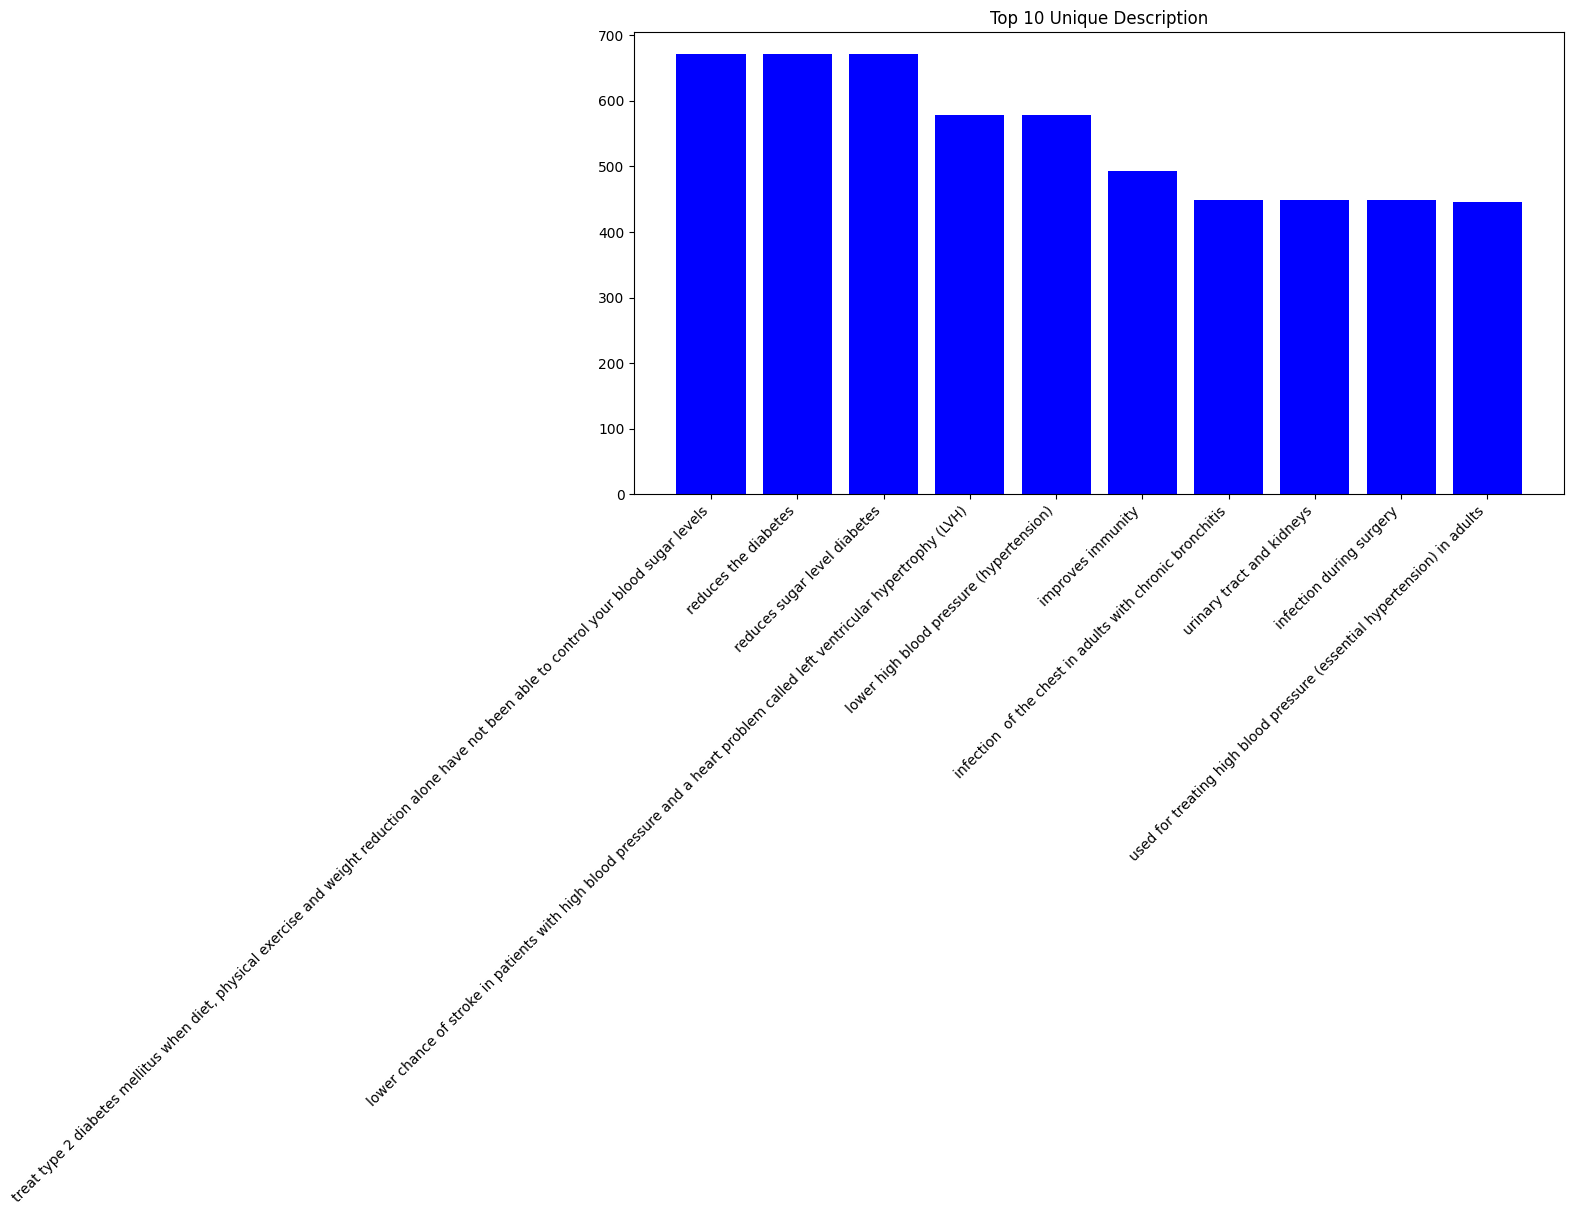

In [10]:
print(f'Dataset has {len(medicine_df.Description.unique())} unique names')
print('*'*20)
print(f'And the top 10 counts are :')
print(medicine_df.value_counts().head(10))
print('*'*20)

c = medicine_df.Description.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
plt.title("Top 10 Unique Description")
ax.bar(c.index, c.values, width=0.8, color='b')
plt.xticks(rotation=45, ha='right')


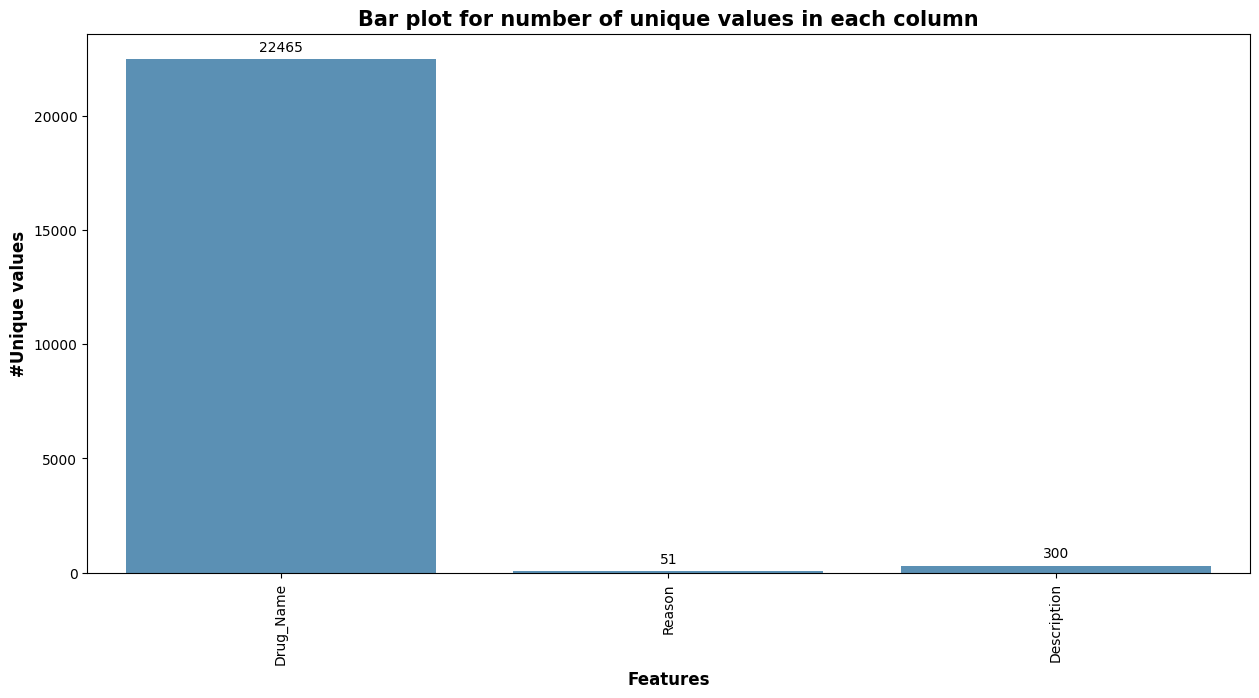

In [11]:
unique_df = pd.DataFrame()
unique_df['Features'] = medicine_df.columns
unique=[]
for i in medicine_df.columns:
    unique.append(medicine_df[i].nunique())
unique_df['Uniques'] = unique
f, ax = plt.subplots(1,1, figsize=(15,7))
splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

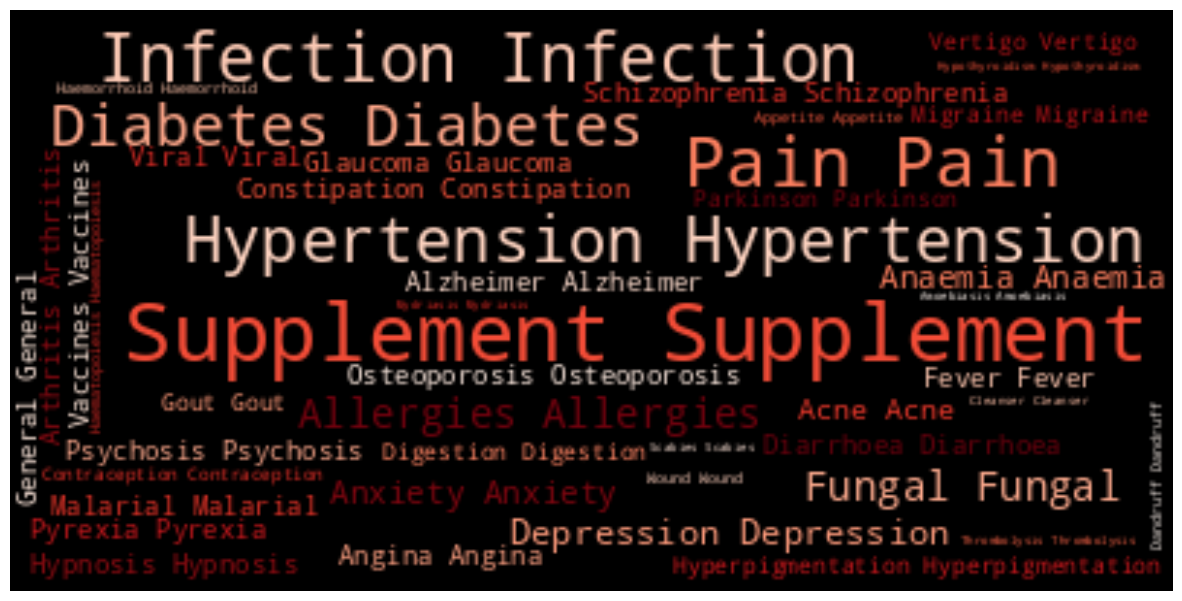

<Figure size 1000x600 with 0 Axes>

In [12]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in medicine_df.Reason)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Reds', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [13]:
rating_df=pd.read_excel("/content/Ratings.xlsx")
rating_df.head()

,Short-form,Rating
0,S,4.8
1,R,4.7
2,D,4.5
3,C,4.3
4,B,4.1


In [14]:
rating_df = rating_df.rename(columns={'Short-form':'form'})

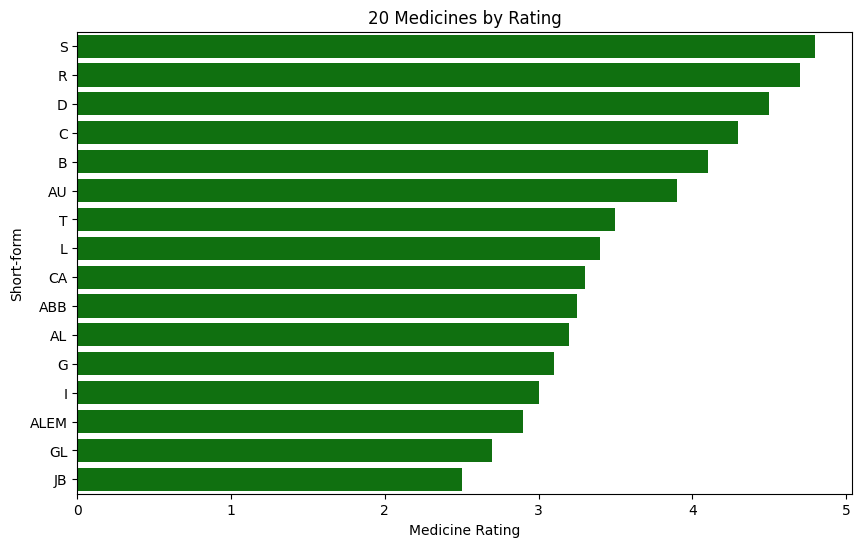

In [15]:
top_medicine = rating_df.sort_values(by='Rating', ascending=False)[:20]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_medicine.form, x=top_medicine.Rating, color='green')
plt.xticks()
plt.xlabel('Medicine Rating')
plt.ylabel('Short-form')
plt.title('20 Medicines by Rating')
plt.show()

In [19]:
company_df = pd.read_excel("/content/Company_Name.xlsx")
company_df.head()

,S.No,Company_Name,NSE_Symbol,Rating,Industry
0,1,Sun Pharmaceutical Industries Ltd.,SUNPHARMA,S,Pharmaceuticals & Drugs
1,2,Dr. Reddys Laboratories Ltd.,DRREDDY,R,Pharmaceuticals & Drugs
2,3,Divis Laboratories Ltd.,DIVISLAB,D,Pharmaceuticals & Drugs
3,4,Cipla Ltd.,CIPLA,C,Pharmaceuticals & Drugs
4,5,Biocon Ltd.,BIOCON,B,Pharmaceuticals & Drugs


In [20]:
company_df.columns.tolist()

['S.No', 'Company_Name', 'NSE_Symbol', 'Rating', 'Industry']

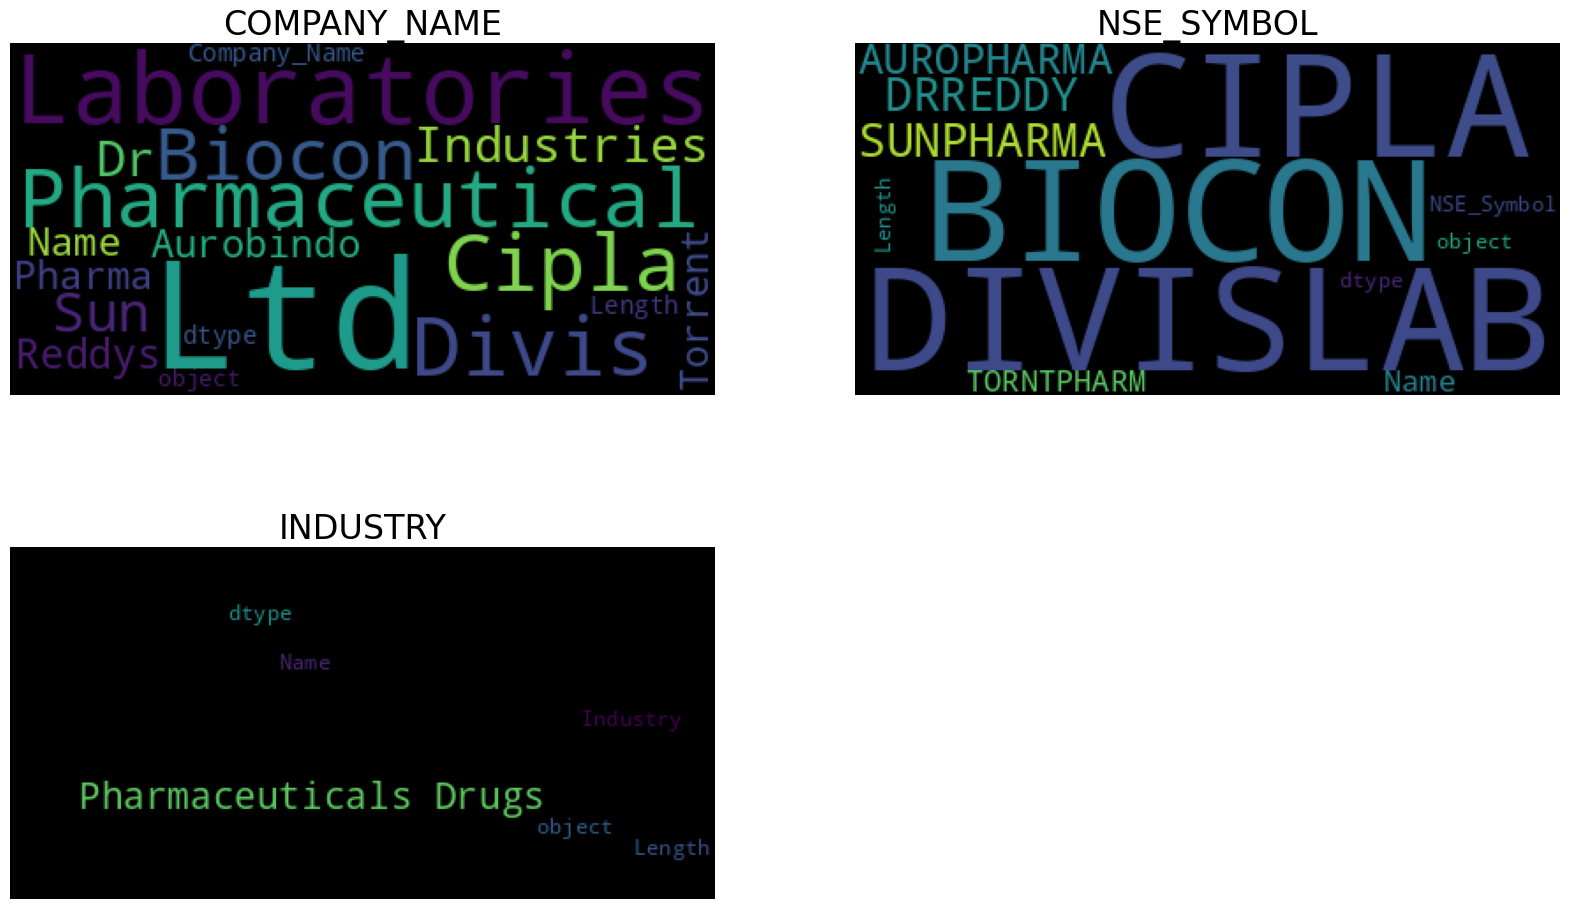

In [21]:
text_cols = ['Company_Name','NSE_Symbol', 'Industry']

from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_cols):
  op = wc.generate(str(company_df[c]))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(c.upper(), fontsize=24)
  _ = axes[i].axis('off')

_ = fig.delaxes(axes[3])

In [22]:
s = (company_df.isna().sum()/company_df.shape[0]*100)<50
df2_modified = company_df[s.index[s].tolist()]
print (df2_modified.shape)
df2_modified.head()

(22481, 5)


,S.No,Company_Name,NSE_Symbol,Rating,Industry
0,1,Sun Pharmaceutical Industries Ltd.,SUNPHARMA,S,Pharmaceuticals & Drugs
1,2,Dr. Reddys Laboratories Ltd.,DRREDDY,R,Pharmaceuticals & Drugs
2,3,Divis Laboratories Ltd.,DIVISLAB,D,Pharmaceuticals & Drugs
3,4,Cipla Ltd.,CIPLA,C,Pharmaceuticals & Drugs
4,5,Biocon Ltd.,BIOCON,B,Pharmaceuticals & Drugs


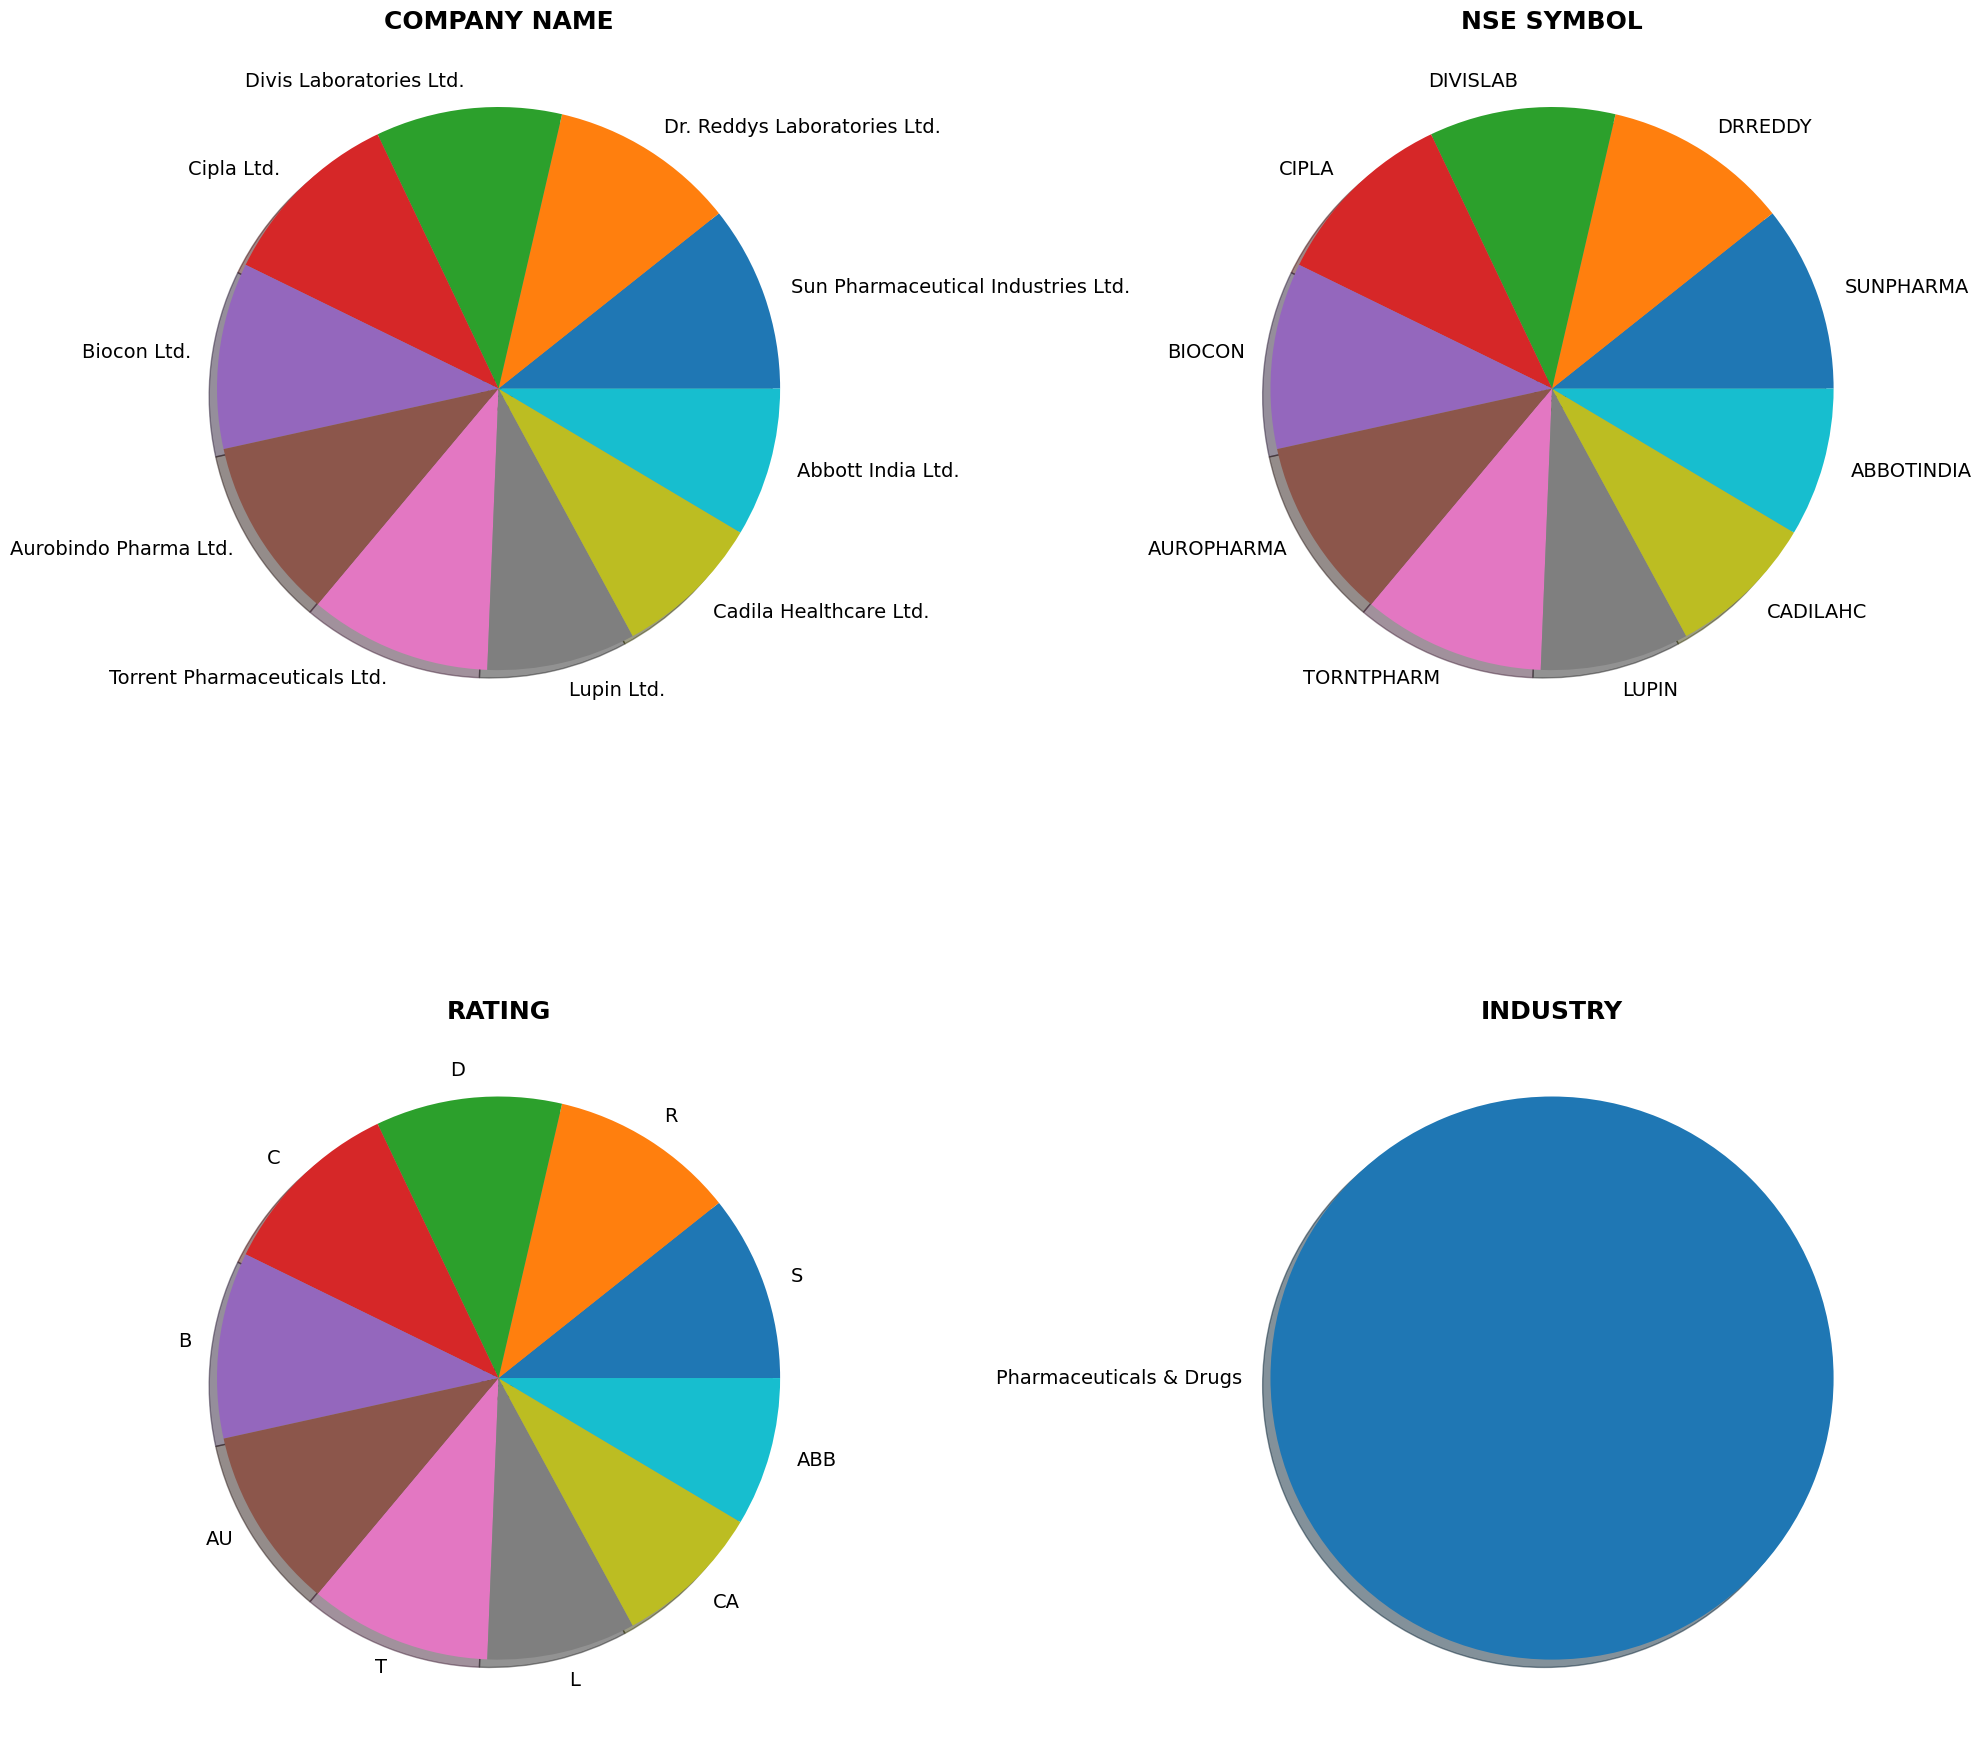

In [23]:
import math
plt.rcParams['font.size']=14
fig, ax = plt.subplots(2,2, figsize=(20,20))
for col, ax in zip(['Company_Name','NSE_Symbol','Rating', 'Industry'], ax.flat):
    dict_ = df2_modified[col].value_counts().head(10).to_dict()
    if ('Not Available' in dict_.keys()):
        dict_.pop('Not Available')
    labels = []
    for i in dict_.keys():
        i = i.split(' ')
        if (len(i) > 6):
            i[math.ceil(len(i)/2)-1] += '\n'
            labels.append(' '.join(i))
        else:
            labels.append(' '.join(i))
    ax.pie(x=list(dict_.values()), labels=labels, shadow=True, startangle=0)
    col_title = (' '.join(col.split('_'))).upper()
    ax.set_title(col_title, weight='bold', fontsize=18)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [25]:
rating_df.rename(columns={'form': 'Rating_Code', 'Rating': 'Numerical_Rating'}, inplace=True)
company_df.rename(columns={'Rating': 'Rating_Code'}, inplace=True)
merged_company_ratings_df = pd.merge(company_df, rating_df, on='Rating_Code')

Creating a Combined Feature for this Model
and, handing any potential missing values in the text.

In [26]:
medicine_df['combined_features'] = medicine_df['Reason'] + ' ' + medicine_df['Description']
medicine_df['combined_features'].fillna('', inplace=True)

## Feature Engineering

Create a TF-IDF Vectorizer to convert text to numbers

In [27]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(medicine_df['combined_features'])

# Building the Recommendation function

In [28]:
# --- Step 3: Building the Recommendation Function ---
def recommend_medicines(reason, top_n=10):
    """Recommends medicines based on a user's reason."""
    # Create a TF-IDF vector for the input reason
    reason_vector = tfidf_vectorizer.transform([reason])

    # Calculate cosine similarity between the reason and all medicines
    cosine_similarities = cosine_similarity(reason_vector, tfidf_matrix).flatten()

    # Get the indices of the top_n most similar medicines
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]

    # Get the details of the top medicines
    recommendations = medicine_df.loc[top_indices].copy()

    # For demonstration, we'll add some dummy ratings since we can't link companies perfectly
    # In a full system, you'd merge this with your `final_df`
    # Let's add dummy ratings for now
    recommendations['Company_Rating'] = [4.5, 4.8, 4.2, 4.9, 3.8, 4.5, 4.1, 4.7, 4.3, 4.6]

    # Sort the recommendations by rating
    recommendations = recommendations.sort_values(by='Company_Rating', ascending=False)
    return recommendations[['Drug_Name', 'Reason','Company_Rating']]

# Getting Recommendations.....

In [29]:
# Recommendations for 'Acne'
acne_recommendations = recommend_medicines('Acne', top_n=10)
print("--- Top 10 Recommendations for Acne ---")
print(acne_recommendations)

# Recommendations for 'Pain relief'
pain_recommendations = recommend_medicines('Pain relief', top_n=10)
#print("\n--- Top 10 Recommendations for Pain Relief ---")
print("--- Top 10 Recommendations for Pain Relief ---")
print(pain_recommendations)

--- Top 10 Recommendations for Acne ---
                                             Drug_Name Reason  Company_Rating
43                             Aczit 10mg Softgel 10'S   Acne             4.9
100        Camyda 300mg Capsule 10'SCamyda 1% Gel 10gm   Acne             4.8
307  Resoten 10mg Capsule 10'SResoten 20mg Capsule ...   Acne             4.7
198                                  Flexon Cream 15gm   Acne             4.6
293                                   Peroduo Gel 15gm   Acne             4.5
209                             Glyaha Koj Lotion 30gm   Acne             4.5
116                                  Cligel T Gel 15gm   Acne             4.3
44                                     Adabor Gel 15gm   Acne             4.2
199                              Foracne Plus Gel 15gm   Acne             4.1
210                          Glylak 70% Solution 100ml   Acne             3.8
--- Top 10 Recommendations for Pain Relief ---
                                             Drug_Name 

# Doing the Analysis with the BERT Model

In [30]:
!pip install sentence-transformers

In [31]:
from sentence_transformers import SentenceTransformer, util


# Loading the Sentence-BERT Model

In [32]:
# We use a pre-trained model that is excellent for semantic search
print("\nLoading the Sentence-BERT model... (This may take a moment)")
model = SentenceTransformer('all-MiniLM-L6-v2')
print("Model loaded.")


Loading the Sentence-BERT model... (This may take a moment)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model loaded.


# Creating Medicine Embeddings
### This step converts each medicine's description into a vector.

In [33]:
# --- Step 3: Create Medicine Embeddings ---
# This step converts each medicine's description into a vector.
print("\nCreating embeddings for all medicines... (This is a one-time process)")
medicine_embeddings = model.encode(medicine_df['combined_features'].tolist(), convert_to_tensor=True)
print(f"Successfully created {len(medicine_embeddings)} embeddings.")


Creating embeddings for all medicines... (This is a one-time process)
Successfully created 22467 embeddings.


# Building the Recommendation Function

In [34]:

def recommend_medicines_advanced(reason, top_n=10):
    """Recommends medicines using Sentence-BERT embeddings."""

    # 1. Encode the user's reason into a vector
    reason_embedding = model.encode(reason, convert_to_tensor=True)

    # 2. Use semantic search to find the most similar medicines
    # This is much faster than calculating cosine similarity manually
    hits = util.semantic_search(reason_embedding, medicine_embeddings, top_k=top_n)

    # The result is a list of lists, so we take the first element
    hits = hits[0]

    # 3. Get the indices of the recommended medicines
    top_indices = [hit['corpus_id'] for hit in hits]

    # 4. Retrieve the details of the top medicines
    recommendations = medicine_df.iloc[top_indices].copy()

    # For now, we'll assign some plausible ratings for ranking.
    recommendations['Company_Rating'] = [hit['score'] * 5 for hit in hits] # Use similarity score as a proxy
    recommendations = recommendations.sort_values(by='Company_Rating', ascending=False)

    return recommendations[['Drug_Name', 'Reason', 'Description', 'Company_Rating']]

In [35]:
# Example 1: Get recommendations for 'Fungal infection'
fungal_recommendations = recommend_medicines_advanced('Fungal skin infection')
print("\n--- Top Recommendations for 'Fungal skin infection' ---")
print(fungal_recommendations)
# Example 2: Get recommendations for 'headache and fever'
pain_recommendations = recommend_medicines_advanced('sore throat and headache')
print("\n--- Top Recommendations for 'sore throat and headache' ---")
print(pain_recommendations)


--- Top Recommendations for 'Fungal skin infection' ---
                                              Drug_Name  Reason  \
7413  Seriva Cream 30gmSeriva Cream 10gmSeriva 2% Lo...  Fungal   
7422             Sertaset Cream 30gmSertaset Cream 15gm  Fungal   
7449                               TEF 250mg Tablet 7'S  Fungal   
7440  Surfaz SN Cream 10gmSurfaz SN 0.025/0.5/1% Cre...  Fungal   
7431                     SPEXIDIME Dusting Powder 100gm  Fungal   
7476  Terbitotal 500mg Tablet 7'STerbitotal 1% Cream...  Fungal   
7485              Terfung Lotion 15mlTerfung Cream 10gm  Fungal   
7494                                Topinova Cream 10gm  Fungal   
7467                            Terbinator M Cream 10gm  Fungal   
7458                              Terbiclair Cream 10gm  Fungal   

                            Description  Company_Rating  
7413  recommended for fungal infections        3.752537  
7422  recommended for fungal infections        3.752537  
7449  recommended for fungal in

In [1]:
pip install streamlit-extras

# Deploying the ML model using Streamlit

In [4]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# ---------- CONFIG ----------
st.set_page_config(page_title="MediGuide", page_icon="", layout="wide")
LOGO_PATH = "/content/Logo.png"
DATA_PATH = "Medicine_description.xlsx"

# ---------- INITIALIZE SESSION STATE ----------
if 'page' not in st.session_state:
    st.session_state.page = 'Home'

# ---------- THEME / CSS ----------
st.markdown("""
<style>
/* App background: soft healthcare gradient */
.stApp {
  min-height: 100vh;
  background: linear-gradient(180deg, #f3fbff 0%, #ffffff 45%, #eaf5ff 100%);
}

/* Layout width */
.block-container { max-width: 1100px; padding-top: 1rem; }

/* --- Navigation Bar --- */
.nav-container {
    display: flex;
    justify-content: center; /* Center the links */
    align-items: center;
    padding: 1rem 0;
    margin-bottom: 2rem;
    border-bottom: 1px solid #e5e7eb;
    border-top: 1px solid #e5e7eb; /* Added top border for style */
}
a.nav-link {
    font-size: 17px;
    font-weight: 600;
    color: #475569;
    margin: 0 20px; /* Adjusted margin for centered look */
    text-decoration: none;
    transition: color 0.3s, border-bottom 0.3s;
    padding-bottom: 5px;
    border-bottom: 2px solid transparent;
}
a.nav-link:hover {
    color: #004aad;
}
a.nav-link.active {
    color: #004aad;
    border-bottom: 2px solid #004aad;
}

/* Generic Section container */
.section-container {
    padding: 2rem;
    background: #ffffff;
    border-radius: 16px;
    box-shadow: 0 4px 16px rgba(15, 23, 42, 0.06);
}

/* Headings + text colors */
h1, h2, h3, h4, h5, h6 { color: #0b1320; }
p, span, label, div { color: #1f2937; }



/* Hero styling */
.hero-title { font-size: 44px; font-weight: 800; line-height: 1.1; margin: 8px 0 4px 0; text-align: center; color: #004aad; }
.hero-tagline { font-size: 18px; color: #475569; margin-top: 4px; text-align: center; }
.section-title { font-size: 32px; font-weight: 700; margin: 20px 0 12px 0; }

/* Input */
div[data-baseweb="input"] > div { border-radius: 14px !important; border: 1px solid #dbe7ff !important; box-shadow: 0 1px 2px rgba(0,0,0,0.04); background-color: #ffffff !important; }
input[type="text"] { padding: 14px 16px !important; font-size: 16px !important; color: #000000 !important; }

/* Main "Get Recommendations" Button */
.stButton > button { width: 100%; padding: 14px 18px; border-radius: 14px; background: #1e66ff; color: white; font-weight: 700; font-size: 18px; border: 0; box-shadow: 0 2px 6px rgba(30,102,255,0.25); }
.stButton > button:hover { filter: brightness(0.95); }

/* Recommendation card */
.med-card { background: #ffffff; border: 1px solid #e9efff; border-radius: 16px; padding: 18px; box-shadow: 0 4px 16px rgba(15, 23, 42, 0.06); margin-bottom: 18px; }
.med-title { color: #0c4aef; font-size: 22px; font-weight: 800; margin: 0 0 8px 0; }
.med-reason { font-size: 18px; margin: 0 0 4px 0; color: #0b1320; }
.med-desc { color: #5b6573; margin: 0 0 10px 0; }
.med-score { color: #0f9d58; font-weight: 700; }
</style>
""", unsafe_allow_html=True)


# ---------- MODEL & DATA (Loaded only once) ----------
@st.cache_resource
def load_model():
    return SentenceTransformer('all-MiniLM-L6-v2')
@st.cache_data
def load_and_prepare_data(path: str):
    df = pd.read_excel(path)
    df['Reason'] = df['Reason'].fillna('')
    df['Description'] = df['Description'].fillna('')
    df['combined_features'] = df['Reason'] + '. ' + df['Description']
    return df
@st.cache_data
def create_embeddings(_df, _model):
    return _model.encode(_df['combined_features'].tolist(), convert_to_tensor=True)

model = load_model()
medicine_df = load_and_prepare_data(DATA_PATH)
medicine_embeddings = create_embeddings(medicine_df, model)

# ---------- HERO SECTION (LOGO AND TITLE) ----------
st.image(LOGO_PATH, width=250)
st.markdown('<div class="hero-title">💊MediGuide</div>', unsafe_allow_html=True)
st.markdown('<div class="hero-tagline">Smart AI-powered guidance for medicines and health concerns</div>', unsafe_allow_html=True)


# ---------- PAGE CONTENT ROUTING ----------

# --- (MOVED) NAVIGATION BAR ---
st.session_state.page = st.query_params.get('page', 'Home')
home_class = "active" if st.session_state.page == 'Home' else ""
how_class = "active" if st.session_state.page == 'How it works' else ""
about_class = "active" if st.session_state.page == 'About' else ""
contact_class = "active" if st.session_state.page == 'Contact' else ""

st.markdown(f"""
<div class="nav-container">
    <a class="nav-link {home_class}" href="?page=Home">Home</a>
    <a class="nav-link {how_class}" href="?page=How+it+works">How it works</a>
    <a class="nav-link {about_class}" href="?page=About">About</a>
    <a class="nav-link {contact_class}" href="?page=Contact">Contact</a>
</div>
""", unsafe_allow_html=True)


# --- HOME PAGE CONTENT ---
if st.session_state.page == 'Home':
    st.markdown('<div class="section-title">🔎 Enter your health concern</div>', unsafe_allow_html=True)
    placeholder = "e.g., fever, headache, sore throat"
    user_input = st.text_input("", value="", placeholder=placeholder, label_visibility="collapsed")
    go = st.button("Get Recommendations")

    if go:
        if not user_input.strip():
            st.warning("Please enter a health concern.")
        else:
            query_embedding = model.encode(user_input, convert_to_tensor=True)
            hits = util.semantic_search(query_embedding, medicine_embeddings, top_k=6)[0]
            top_indices = [h['corpus_id'] for h in hits]
            recs = medicine_df.iloc[top_indices].copy()
            recs['Similarity_Score'] = [h['score'] for h in hits]
            st.markdown("### Here are your top recommendations:")
            cols = st.columns(2)
            for i, (_, row) in enumerate(recs.iterrows()):
                with cols[i % 2]:
                    st.markdown(f"""
                    <div class="med-card">
                        <div class="med-title">{row.get('Drug_Name','Unknown')}</div>
                        <div class="med-reason">{row.get('Reason','')}</div>
                        <div class="med-desc">{row.get('Description','')}</div>
                        <div class="med-score">Match Score: {row['Similarity_Score']:.2f}</div>
                    </div>""", unsafe_allow_html=True)

# --- HOW IT WORKS PAGE ---
elif st.session_state.page == 'How it works':
    st.markdown('<div class="section-container">', unsafe_allow_html=True)
    st.header("How MediGuide Works ⚙️")
    st.write("---")
    st.subheader("Step 1: Describe Your Symptoms")
    st.write("Navigate to the **Home** page and use the search bar to enter your health symptoms or the name of a medicine you have a question about.")
    st.subheader("Step 2: AI Analysis")
    st.write("Our smart AI model instantly analyzes your input. It uses semantic search to compare your query against a vast database of medicine information to find the most relevant matches.")
    st.subheader("Step 3: Get Guidance")
    st.write("Receive a ranked list of medicine recommendations, complete with descriptions and reasons for their use. **Disclaimer:** This is not a substitute for professional medical advice. Always consult a healthcare provider.")
    st.markdown('</div>', unsafe_allow_html=True)

# --- ABOUT PAGE ---
elif st.session_state.page == 'About':
    st.markdown('<div class="section-container">', unsafe_allow_html=True)
    st.header("About MediGuide ℹ️")
    st.write("---")
    st.subheader("What is MediGuide?")
    st.write("""
    **MediGuide** is an intelligent, AI-powered application designed to provide instant guidance on medicines and health concerns.
    By leveraging advanced semantic search technology, MediGuide helps you quickly find relevant information based on your symptoms or queries.
    """)
    st.subheader("Our Mission")
    st.write("""
    Our mission is to make health and medicine information more accessible and understandable. We aim to empower users to make more informed decisions by providing clear, AI-driven insights. MediGuide serves as a helpful first step in your health journey.
    """)
    st.subheader("Technology")
    st.write("""
    This app is built with **Python** and **Streamlit**, utilizing the **Sentence-Transformers** library to understand and process user queries effectively. It's a demonstration of how modern AI can simplify access to complex information.
    """)
    st.markdown('</div>', unsafe_allow_html=True)

# --- CONTACT PAGE ---
elif st.session_state.page == 'Contact':
    st.markdown('<div class="section-container">', unsafe_allow_html=True)
    st.header("Contact Information 📧")
    st.write("---")
    st.write("Feel free to reach out for collaborations or inquiries.")
    st.write(f"**Name**: Ashmit Saini")
    st.write(f"**Email**: ashmitsaini0511@gmail.com")
    st.write(f"**Phone**: +917417676876")
    st.write(f"**Location**: New Delhi")
    st.markdown("""
        <p style="margin-top:1rem;">
            <a href="https://www.linkedin.com/" target="_blank" style="margin-right: 15px; text-decoration:none; color: #0077B5; font-weight: bold;">LinkedIn</a> |
            <a href="https://github.com/" target="_blank" style="margin-right: 15px; text-decoration:none; color: #333; font-weight: bold;">GitHub</a> |
            <a href="#" target="_blank" style="text-decoration:none; color: #004aad; font-weight: bold;">Portfolio</a>
        </p>
    """, unsafe_allow_html=True)
    st.markdown('</div>', unsafe_allow_html=True)

Overwriting app.py


In [6]:
!pip install pyngrok
!ngrok authtoken 1neOH1zvdaTceJARPqljugmwOGs_3T9s6YsFJDcjhC7QdncW9
from pyngrok import ngrok
import os

# Make sure the app.py file exists before trying to run it
if not os.path.exists('app.py'):
    print("Error: app.py not found. Please be sure to run the '%%writefile app.py' cell above.")
else:
    # Terminate any existing ngrok tunnels
    ngrok.kill()

    # Start ngrok tunnel to expose Streamlit's default port (8501)
    public_url = ngrok.connect("8501")
    print("🚀 Your app is live!")
    print(f"Click the link to view: {public_url}")

    # Run the Streamlit app as a background process
    # This is a more stable way to run it in Colab
    !nohup streamlit run app.py &



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🚀 Your app is live!
Click the link to view: NgrokTunnel: "https://7acfe495b3a5.ngrok-free.app" -> "http://localhost:8501"
nohup: appending output to 'nohup.out'
